# Initialisation du Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from google.colab import data_table

*Récupération* des jeu de données nécessaires

In [2]:
!wget https://raw.githubusercontent.com/datacorner/les-tutos-datacorner.fr/master/datasources/titanic/train.csv
!wget https://raw.githubusercontent.com/datacorner/les-tutos-datacorner.fr/master/datasources/univariate_linear_regression_dataset.csv

--2024-03-04 14:23:39--  https://raw.githubusercontent.com/datacorner/les-tutos-datacorner.fr/master/datasources/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.007s  

2024-03-04 14:23:39 (8.00 MB/s) - ‘train.csv’ saved [61194/61194]

--2024-03-04 14:23:39--  https://raw.githubusercontent.com/datacorner/les-tutos-datacorner.fr/master/datasources/univariate_linear_regression_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request 

In [3]:
titanic = pd.read_csv("train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# One-Hot encoding

In [ ]:
display(titanic.columns)
cols = ['Sex', 'Embarked']
for col in cols:
    display('Column: ' + col)
    display(titanic[col].value_counts())
data_dummies = pd.get_dummies(titanic,
                              prefix=['S', 'E'],
                              columns=['Sex', 'Embarked'])
display(data_dummies.columns)
data_dummies.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Column: Sex'

male      577
female    314
Name: Sex, dtype: int64

'Column: Embarked'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'S_female', 'S_male', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,S_female,S_male,E_C,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


# Feature scaling

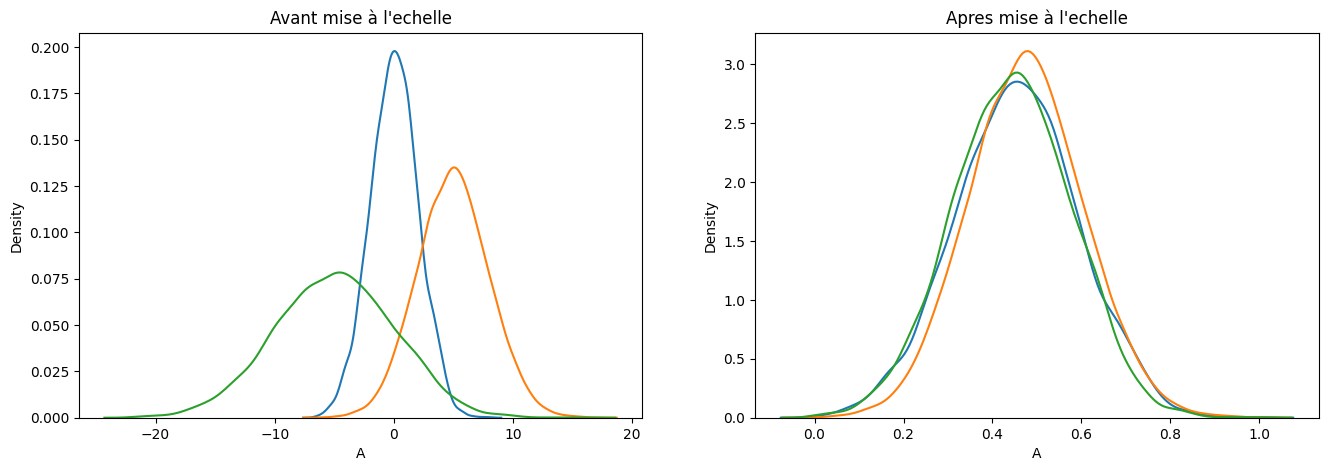

In [ ]:
np.random.seed(1)
NBROWS = 5000
def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.show()
df = pd.DataFrame({ 'A': np.random.normal(0, 2, NBROWS),
                    'B': np.random.normal(5, 3, NBROWS ),
                    'C': np.random.normal(-5, 5, NBROWS) })
scaler = MinMaxScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols] )
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

# Dataset split

In [ ]:
train = pd.read_csv("train.csv")
X = train.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' ], axis=1)
X['Pclass'] = X['Pclass'].fillna(5)
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Fare'] = X['Fare'].fillna(X['Fare'].mean())
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Train=" + str(X_train.shape) + ", Test=" + str(X_test.shape))

Train=(596, 6), Test=(295, 6)


# Regression univariée

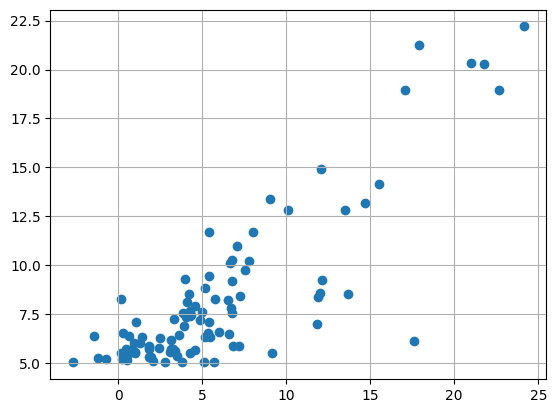

In [ ]:
data = pd.read_csv('univariate_linear_regression_dataset.csv')
plt.scatter(data.col2, data.col1)
plt.grid()

Entraînement du modèle

In [ ]:
X = data.col2.values.reshape(-1, 1)
y = data.col1.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

Prédiction d'une valeur qui n'existe pas dans le jeu de données ...

In [ ]:
regr.predict(np.array([[30]]))

array([[22.37707681]])

In [ ]:
predictions = range(30,51)
results = []
for pr in predictions:
    results.append([pr, regr.predict(np.array([[pr]]))[0][0]])
myResult = pd.DataFrame(results, columns=['col1', 'col2'])
myResult.head(5)

,col1,col2
0,30,22.377077
1,31,22.965519
2,32,23.553962
3,33,24.142404
4,34,24.730846


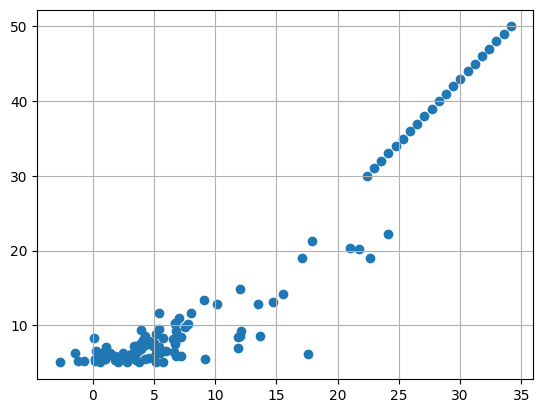

In [ ]:
final = pd.concat([data, myResult])
plt.scatter (final.col2, final.col1)
plt.grid()

# Classification

## Confusion matrix

In [ ]:
def Prepare_Modele(X, cabin):
    target = X.Survived
    sexe = pd.get_dummies(X['Sex'], prefix='sex')
    cabin = pd.get_dummies(cabin.str[0], prefix='Cabin')
    age = X['Age'].fillna(X['Age'].mean())
    X = X[['Pclass', 'SibSp']].join(cabin).join(sexe).join(age)
    return X, target
cabin = titanic['Cabin'].fillna('X')
X, y = Prepare_Modele(titanic, cabin)

Entrainement de l'algorithme Random Forest

In [ ]:
tree = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
tree.fit(X, y)
p_tr = tree.predict(X)

0.9214365881032548

Matrice de confusion

In [ ]:
c_tr = confusion_matrix (y, p_tr)
print ("Matrice de confusion / Random Foret\n", c_tr)

Matrice de confusion / Random Foret
 [[525  24]
 [ 46 296]]


## ROC and AUC curves

Entraine deux autres modèles sur les mêmes données

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X, y)
dummy = DummyClassifier()
dummy.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DummyClassifier()

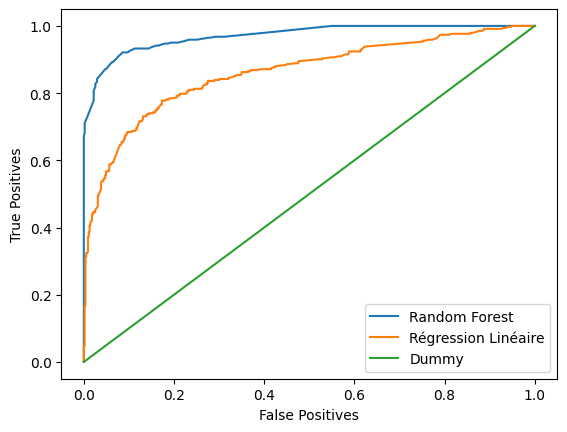

In [ ]:
FP_tr, TP_tr, Thres_tr = roc_curve(y, tree.predict_proba(X)[:,1])
plt.plot(FP_tr, TP_tr, label="Random Forest")
FP_rl, TP_rl, Thres_tr = roc_curve(y, lr1.decision_function(X))
plt.plot(FP_rl, TP_rl, label="Régression Linéaire")
FP_dm, TP_dm, Thres_tr = roc_curve(y, dummy.predict_proba(X)[:,1])
plt.plot(FP_dm, TP_dm, label="Dummy")

plt.xlabel ("False Positives")
plt.ylabel ("True Positives")
plt.legend ()

Calcul de la surface AUC

In [ ]:
print ("AUC Dummy: ",metrics.auc(FP_dm, TP_dm))
print ("AUC Reg. linéaire: ",metrics.auc(FP_rl, TP_rl))
print ("AUC Random Forest: ",metrics.auc(FP_tr, TP_tr))

AUC Dummy:  0.5
AUC Reg. linéaire:  0.860615792669287
AUC Random Forest:  0.9708374609870152


# eXplainable AI (XAI)

In [7]:
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')
all_data = pd.concat([train, test], axis=0)

Regardons la distribution et correlations potentielle entre median_income et median_house_value

<Axes: xlabel='median_income', ylabel='median_house_value'>

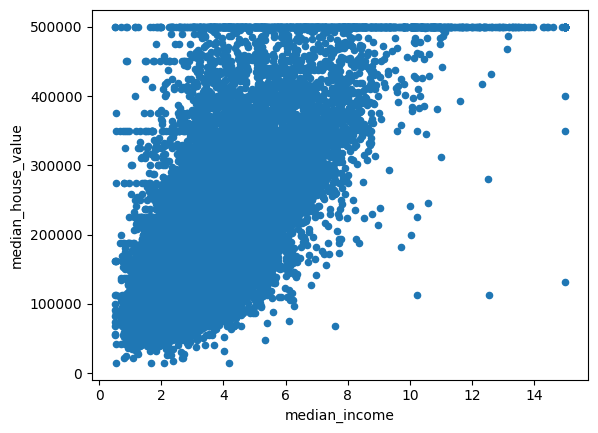

In [8]:
all_data.plot.scatter("median_income", "median_house_value")

In [9]:
scaler = StandardScaler()
def prepare_data(data, scale=True):
  names = data.columns
  if (scale == True):
    scaled_data = scaler.fit_transform(data)
    data = pd.DataFrame(scaled_data, columns=names)
  y_label = ["median_house_value"]
  X = data[names]
  del X["median_house_value"]
  y = data[y_label]
  x_train,x_test,y_train,y_test=train_test_split(X, y,
                         test_size=0.2,
                         random_state=1)
  return x_train,x_test,y_train,y_test
x_train, x_test, y_train, y_test = prepare_data(all_data)
model_2_rforest = RandomForestRegressor()
model_2_rforest.fit(x_train, y_train)

<ipython-input-9-7f9ff1077312>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_2_rforest.fit(x_train, y_train)


RandomForestRegressor()

Scoring du modèle

In [10]:
print(f"Score / training data: {round(model_2_rforest.score(x_train, y_train)*100, 1)} %")
print(f"Score / test data: {round(model_2_rforest.score(x_test, y_test)*100, 1)} %")

Score / training data: 97.5 %
Score / test data: 81.0 %


Influence des variables sur le modèle:

   Feature Importance        Feature Name
7            0.519986       median_income
0            0.161654           longitude
1            0.150812            latitude
2            0.062461  housing_median_age
5            0.035512          population
4            0.026236      total_bedrooms
3            0.024656         total_rooms
6            0.018683          households


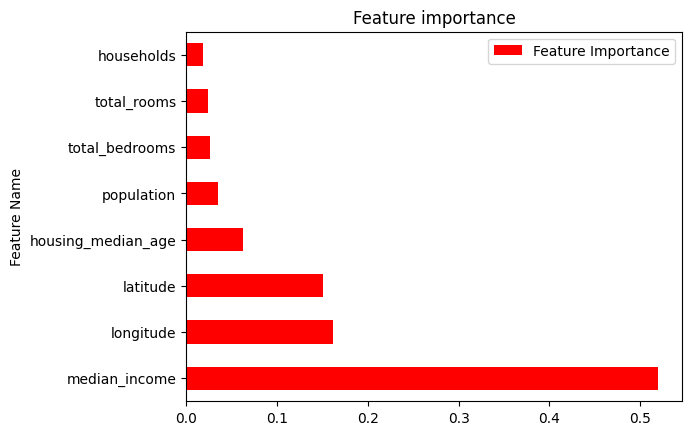

In [24]:
def display_feat_imp_rforest(rforest):
  feat_imp = rforest.feature_importances_
  df_featimp = pd.DataFrame(feat_imp, columns = ["Feature Importance"])
  df_featimp["Feature Name"] = x_train.columns
  df_featimp = df_featimp.sort_values(by="Feature Importance",
                                      ascending=False)
  print(df_featimp)
  df_featimp.plot.barh(y="Feature Importance",
                       x="Feature Name",
                       title="Feature importance",
                       color="red")
display_feat_imp_rforest(model_2_rforest)